## Solving the Buffon's needle problem using Monte-Carlo methods in order to approximate a value for pi

**Introduction**

During the 18th century Georges-Louis Leclerc, Comte de Buffon posed a question regarding the probabilistic nature of a simple event, the tossing of a needle. The question asked: what is the chance that a needle dropped randomly onto a floor marked with equally spaced parallel lines will cross one of the lines? The resulting solution of this problem paved a new way of analyzing probabilities of geometric events called Geometric probability [1], the solution itself can be achieved using integral Geometry to achieve a solution of :

(1)
$$
P = 2l/\pi d
$$

where **l** and **d** are the length of the needles and the spacing between the parallel lines respectively. It can be seen that $\pi$ itself comes up in this probability due to the angle of rotation that the needles have, it can also easily be seen that $\pi$ itself can be determined given that there is a large enough number of needles that would *settle* the probability up to the determined mathematical value. The resultant relationship between the probability and the properties of the space and objects that are thrown onto this space paved new and more practical uses of "Buffon's needle" from uses in agricultural satellite imaging[2], to a determination of immigration patterns[3]. It can be seen that more applications than just calculating  $\pi$ are present in this question and so it should be a topic of great interest to sectors that work with data collection and manipulation.

However, Georges-Louis Leclerc, Comte de Buffon found an incredibly short way to solve this problem using mathematical analysis and probability density integration, to find equation 1. In this particular case, the solution regarding the probability density integration will be avoided to ensure that we have a purely Monte-Carlo solution to this problem. By abstracting the plane to just being two parallel lines, Georges-Louis Leclerc found the allowed values for the distance to the nearest line from the midpoint of the needle and the allowed angle of the needle and found them to be:

(2)
$$
0 \leq x \leq d/2     
$$
(3)
$$
0 \leq \theta \leq \pi/2
$$

If the vertical component bewteen the midpoint of the needle and one of its ends is bigger than the distance to the nearest line,then there will be an interception,the condition for an interception is:

(4)
$$
x \leq lsin\theta/2 
$$

In this investigation the use of Montecarlo methods to randomly generate data points called "needles" will be used to investigate how the probability that a thrown "needle" will intersect a parallel line changes, with this, the investigation aims to confirm that the use of Monte Carlo methods is sufficient to approximate pi to a good degree, and to confirm that using Monte-Carlo methods regarding Georges-Louis's question is feasible. Furthermore, this investigation aims at developing two models for this problem, one "raw" model which will not take into account any mathematical relationships in the problem, and one "analytical" model which will take into account these mathematical relationships to see if a more efficient solution can be developed.

Firstly the "raw" solution will be developed, Object-oriented programming will be used as the solution will take into account the space in which the needles are dropped and the needles themselves, all of which can be constructed as objects which can easily interact with each other. The "analytical" solution will use a standard modular approach where the space will be abstracted and the boundary conditions of the properties of a needle will be evaluated and used to determine a probability.


## Methods

Firstly the "raw" algorithm for the Buffon's needle will be developed. As stated, an object-oriented approach will be used to evaluate this solution. Firstly the appropriate modules will be imported, NumPy[5] and Matplotlib[6] being the most important of them, the Mlines module will also be imported as it will be used to plot the parallel lines that the needles will be intersecting.

In [42]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

Now to describe a complete system, several variables will need to be defined. The boundary will be the size of the space, and thus will contribute to the number of parallel lines that are present in the space, the number of needles, the length of the needles, and the width of the floorboards. With these variables, the colours of the objects will also be defined. These can be any value that the user wishes them to be, however, it is good to note that in order to calculate $\pi$ the spacing between the parallel lines must equal or be larger than the lenght of a needle[4].

In [43]:
boundary=10 # the size of the space that the needles will be dropped at
needles=10 # total needles dropped
needle_lenght=1#the lenght of a needle
floorboard_width=1#spacing between floorborads
floorboard_color="black"
needle_cut_color="red"
needle_color="black"

after these variables are defined, the needle class will be defined. The Needle class will be used to create a needle object, this needle object has a random x,y coordinate and a random $\theta$ coordinate. The x,y coordinates will be appointed to the midpoint of the needle, the generated angle, alongside the determined length of the needle, can be used to find the endpoints of the needle. These endpoints can then be found with respect to the origin of the space.

In [44]:
class Needle:
    """generates a needle by generating random x,y, and theta values,it then uses these values to set the midpoint of the needle and to find the endpoints of the needle"""
    def __init__(self,lenght=needle_lenght): # will create a needle
        x=random.uniform(0,boundary)# will select an x coordinate to drop the needle
        y=random.uniform(0,boundary)#selects random y value
        theta = random.uniform(0,np.pi)#selects angle value pi to 2pi is arbitrary
        self.midpoint=np.array([x,y])#will store the midpoint 
        self.components=np.array([needle_lenght/2 * np.cos(theta), needle_lenght/2 *np.sin(theta)])#will store the components of the end points of the needle
        self.component_points=np.array([np.add(self.midpoint, -1 * np.array(self.components)), np.add(self.midpoint, self.components)])#stores the endpoints of the needle with respect to the origin

    def intersects(self,y):
        """ checks wether the endpoints of the needle objects cross the y value passed to the function, if they do returns True, if they do not,returns false"""
        return self.component_points[0][1] < y and self.component_points[1][1] > y#returns true or false dependant on the condition that either endpoint crosses the passed y value

The needle class has an initial __init__ function, this function automatically runs when the class is called and is therefore used to generate the random x,y, and $\theta$ values that are needed, with the range of the random numbers being 0 to the boundary for the x and y values and 0 to pi for the theta value. The midpoint is then set as an array of x,y values, and the x and y components of the endpoints are found using trigonometry. Then to express the endpoints themselves in respect to the origin, the components of the endpoints are added to the midpoint of the needle, making sure that one set of the components are flipped, this is done two times as we have two endpoints of the needle. Next, the "intersects" function has been defined, this has "self" and a "y" value as its parameters and is intended to check whether either of the endpoints of the needle crosses a line with the y value that is passed.

Next, we will have to define a class that will carry on the simulation by plotting all the needles onto a plane with parallel lines plotted. This class will be called Simulation.

In [45]:
class Simulation:
    def __init__(self):
        """creates the simulation, sets the plane and useful variables"""
        self.floorboards=[]# will store the y values of the horizontal lines
        self.boards=int((boundary/floorboard_width)+1)#finds the amount of lines that are present in the plane
        self.needles=[]#will store the needles 
        self.intersections=0# counter for the intersections
        self.buffon = plt.subplot() #plot of needles with floorboards

    def Toss(self):
        """ will generate a needle and check if this needle crosses any of the y values in the floorboards list. 
        always a drawn needle,will increment the intersections counter if that needle crosses a line """
        needle = Needle()#generates needle
        self.needles.append(needle)#adds needle to needle list
        xcoord=[needle.component_points[0][0], needle.component_points[1][0]]#takes the x coord and y coord from the needle class
        ycoord = [needle.component_points[0][1], needle.component_points[1][1]]
        for i in range(self.boards):#loops over all the lines
            if needle.intersects(self.floorboards[i]):#checks if the endpoints intersect a line 
                self.intersections=self.intersections+1#if it does add 1 to the counter
                self.buffon.plot(xcoord,  ycoord, color=needle_cut_color, linewidth=0.5)#draw line
                return#end funciton
        self.buffon.plot(xcoord,  ycoord, color=needle_color, linewidth=0.5)#draw line

    def plot(self):
        """ plots everything and calculates the probabilities and pi"""
        estimate=[]#sets an estimate list which will be used for a probability graph
        for i in range(self.boards):#loops over the boards and draws them
            self.floorboards.append(0+i*floorboard_width)#adds y values to the floorboard list, starting from 0
            self.buffon.hlines(y=self.floorboards[i], xmin=0, xmax=boundary, color=floorboard_color, linestyle='-', linewidth=2.0)#draws the horizontal lines
        for i in range(needles):#loops over the needles
            self.Toss()#tosses a needle
            avrg=self.intersections/len(self.needles)#finds the probability of a needle intersection
            estimate.append(avrg)#adds this probability to the estimate list
        avrg=self.intersections/len(self.needles)#finds the probability for an intersection ( again because we are taking into acocunt all of the needles)
        print(avrg,": the probabillity that a needle will cross the line for",needles," needles with flooraboard width of",floorboard_width," and needle lenght of",needle_lenght  )#prints output
        print("calculated value of pi for this run",(2*needle_lenght)/(avrg*floorboard_width),"with an erorr of :",(2*needle_lenght)/(avrg*floorboard_width)-np.pi )
        plt.figure()#plots graph of needles
        plt.xlabel("number of needles")
        plt.ylabel("average number of needles crossing the lines")
        plt.plot(estimate)#plots probability relationship
        plt.show()

The simulation class has several functions that it must carry out for the simulation to be complete. The class starts with the __init__ function where it defines a list of the floorboards, which will hold the y value of each parallel line and defines the number of boards, boards being the number of parallel lines present in the space. The function also defines the list "needles" which will store the needle objects, from here we will start to count the intersections so we will define a variable called intersections and set it to 0. Next, we use Matplotlib to set a plane in which the simulation can take place and call that plane "buffon".

The next function defined is "Toss" which will place a needle onto the "buffon" plane that has been defined. Firstly a needle is created by calling the "Needle" class, this needle is then stored in the needle list defined earlier. The x coordinate and the y coordinates of both ends of the needle are stored, and then the function iterates over all of the floorboards checking if a needle intersects it using the "needle.intersects" function defined in the Needle class, having the values from the "flooarboards" list being its parameters. If the needle intersects that line, the intersections value is appended and a line is drawn using the x and y coordinates of the endpoints of the needle and the function stops there. If the needle did not intersect any of the parallel lines then the function will draw the needle but just in black color or the color of choice of the user.

The next function which is "plot" will take into account all of the functions defined and plot the image of the needles. It will iterate over the number of boards, and add a "floorboard" y-value onto the "floorboards" list, it will start from 0, and for every iteration, it will add the width of one floorboard so that the lines are evenly spaced, then the function will draw a parallel line using Matplotlib's hlines module with the y-coordinate being the respective y-value for the respective floorboard, taken from the floorboards list. The function will then iterate over the list of needles and call the Toss function so that the needles are drawn onto the plane, it will also record the probability of an intersection event for each number of needles and store these probabilities in an "estimate" list. The function will then calculate the probability of an intersection, by taking into account the number of intersections and the length of the list of the needles, the algorithm will then display the approximation of pi by using equation(1) for its guide in calculations. It will also plot the "estimate" list in order for us to see how the probability changes with respect to a changing number of needles 

now the analytical method will be developed, this method will use relationships shown in equations 2 to 4 to abstract the system.

the code below shows this procedure in full:


In [48]:
import matplotlib.pyplot as plt
import numpy as np
number_of_needles=10000 #sets the number of needles,this code and the 2 lines below it are actually the calling code for the experiment
distance_between_lines=1#sets distance between lines
lenght_of_needle=1#sets lenght of needle




def generate_needle():
    """uses the derived relationships from equations 1-4 to generate a needle,returns either true or false"""
    x=np.random.uniform(0,distance_between_lines/2)#random closest point to a line is genarated
    theta=np.random.uniform(0,np.pi/2)#random allowed value of an angle is genarated             
    if x <= (lenght_of_needle*np.sin(theta)/2):
        return True
    else:
        return False



#---------------------------calling code--- run this when you want to experiment-------------------------



needles=np.zeros(number_of_needles)#generates a list of 0 to store truth or false values of needle intersections
average_estimate=[]#probability list

for i in range(number_of_needles):#loops over the needles
    needles[i]=generate_needle()#substitutes a true/false value into the list
    average_estimate.append(np.average(needles[0:i]))#adds the probability in a variable range of the number of needles

plt.figure()#plots a figure
plt.plot(np.arange(number_of_needles),average_estimate)#plots the probability relationship
plt.xlabel("number of needles")
plt.ylabel("average number of needles crossing the lines")
plt.figure()

print(" the probability estimated is:",average_estimate[len(average_estimate)-1])#outputs essential data
print("the alue of pi estimated is",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines),"with an error of ",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines)-np.pi)

Firstly the necessary modules are imported: Matplotlib and NumPy. The number of needles is defined, taking note that for a larger amount, the probability of an intersection will be more defined. The distance between the two lines is also defined and the length of the needle will be set to 1, it is useful to note that Georges-Louis Leclerc's analysis assumed that the length of the needle is less than the separation of the lines. A function called "generate_needle" picks a random closest distance to one of the lines denoted by "x" which obeys equation(2) and also picks a random angle that obeys equation(3), the function also checks if the two random variables obey equation(4), and if they do the function will return a value of True,and vice versa.

a list of 0 will then be defined with the length of the number of needles, this will act as a form of storage of the needles, where we store if the needles have either intersected a line which is denoted by "True" or in this case 1, or if the needle has not intercepted the line where it will be stored as "False" or 0. We can then iterate over the number of needles, call the "generate_needle" function, and substitute the value returned from the function into the "needles" list. In the same loop, the mean estimate for ranges between 0 to i, where i is a number up to the number of needles, will be calculated, and these will be stored in an "average_estimate" list. This list will contain the probability of an intersection event for different ranges of the "needles" list up to the maximum number of needles so that we can see how the probability changes as more and more needles are taken into account.

The probabilities for each range of needles are then plotted the probability corresponding to a max number of needles will be displayed and used to calculate pi and its error using equation(1).


## Results


Investigating the code from blocks 2-8 yield some interesting results.

Firstly the Needle class will be run to see what values its variables contain, this can be done with the following code:


In [49]:
needle=Needle()
print(needle.midpoint)
print(needle.component_points)
print(needle.intersects(5))

[7.72967182 7.26397356]
[[8.00174402 6.84447777]
 [7.45759963 7.68346936]]
False


it can be seen that the class generates a midpoint in the correct range,(0-10 that is defined) and contains appropriate x and y values for each end of the needle, if the function intersects is called with some value of y then we will get a Boolean signifying if the generated needle crosses a horizontal line with the y value that has been passed.

Now lets generate a simulation and examine the plane and the amount of needles that drop, this can be done by calling the Simulation class and running the "plot" function. For starters the boundary will be 10 units long , and 1000 needles will be dropped, and the width of each floorboard will be 1 unit:

0.618 : the probabillity that a needle will cross the line for 1000  needles with flooraboard width of 1  and needle lenght of 1
calculated value of pi for this run 3.236245954692557 with an erorr of : 0.09465330110276371


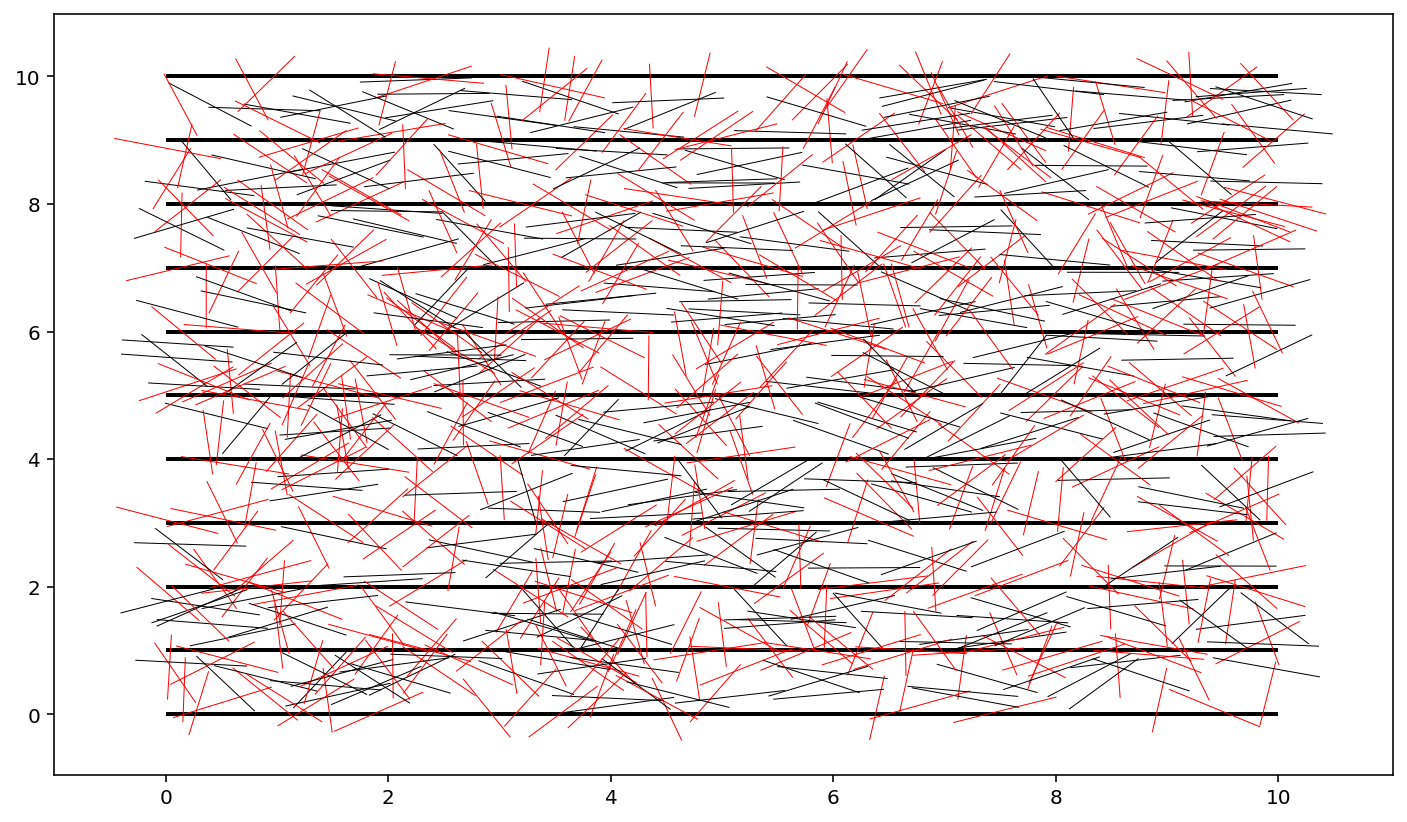

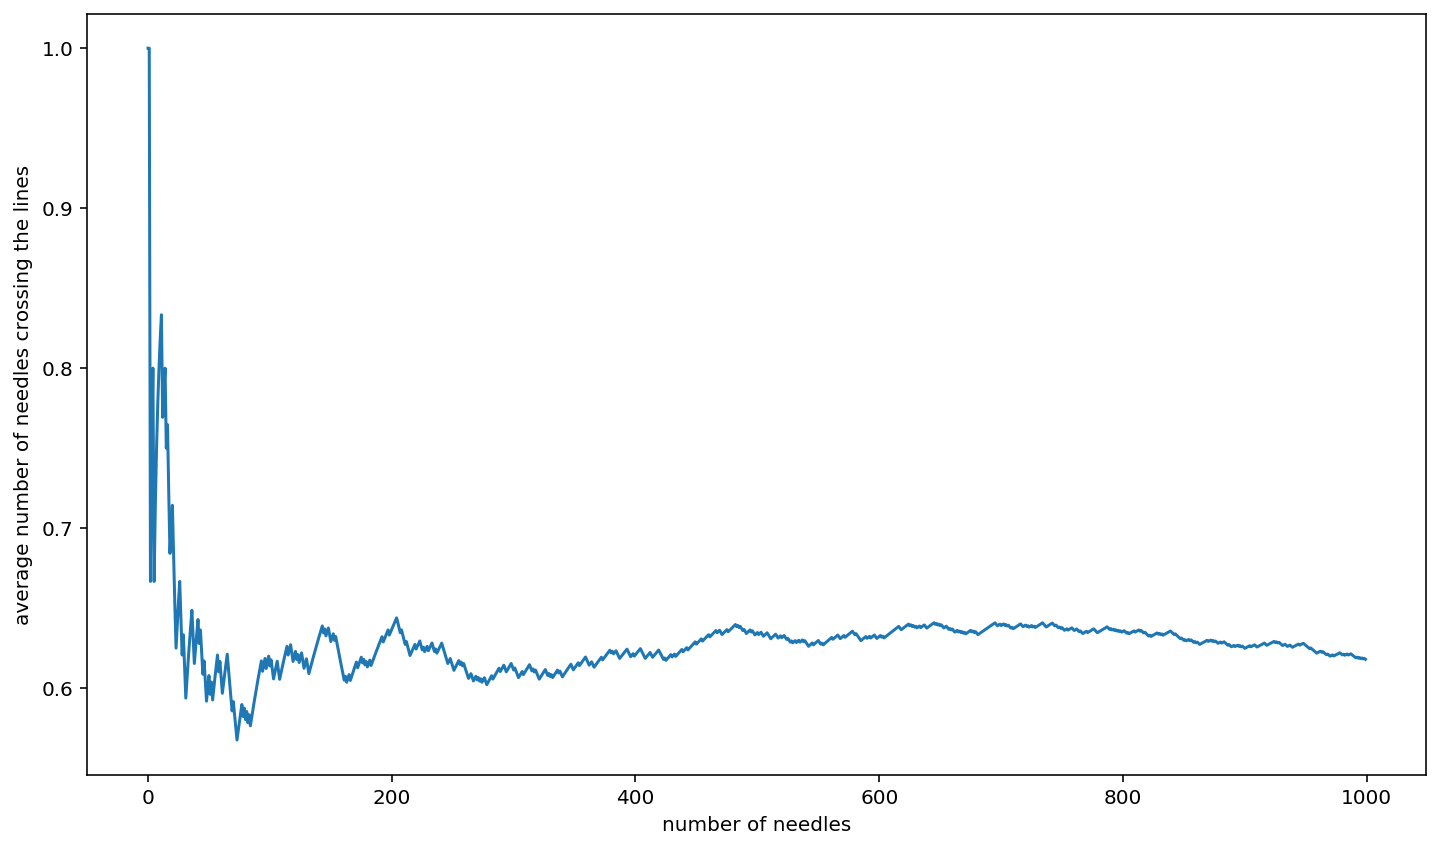

figure 1


In [32]:
boundary=10 # the size of the space that the needles will be dropped at
needles=1000 # total needles dropped
needle_lenght=1#the lenght of a needle
floorboard_width=1#spacing between floorborads
floorboard_color="black"
needle_cut_color="red"
needle_color="black"
sim=Simulation()
sim.plot()
print("figure 1")

Results can be seen in figure 1.

Note that the data values recorded here may change due to the randomness of the solution,these are taken as purely observations to compare solutions. 

It can be seen that the plane is successfully generated and each needle either crosses or doesn't cross the line, shown by the color of the needle. Alongside the image of the needles, the change in the probability of an intersection event with respect to the number of needles evaluated is present, and there can be seen a clear plateau at some value of probability, the change in probability is at first quite chaotic however it quickly stabilizes and settles onto a value. The calculated probability for this experiment is approximated to be 0.618 which has an error of 0.018 from the actual probability derived from equation(1) the calculated value of pi is found to be 3.236245954692557 with an error of 0.09465330110276371

The code is designed to allow flexibility in the settings of the simulations, so the floorboard width, needle length, amounts of needles, and their colors can be changed easily, for example, let's change the number of needles to 200 so that we can see how probability acts and changes for a low number of needles, we will also change various settings such as the boundary to see if we get a value of the probability as described in equation 1 and thus a good approximation of pi.


0.635 : the probabillity that a needle will cross the line for 200  needles with flooraboard width of 2  and needle lenght of 2
calculated value of pi for this run 3.149606299212598 with an erorr of : 0.008013645622805043


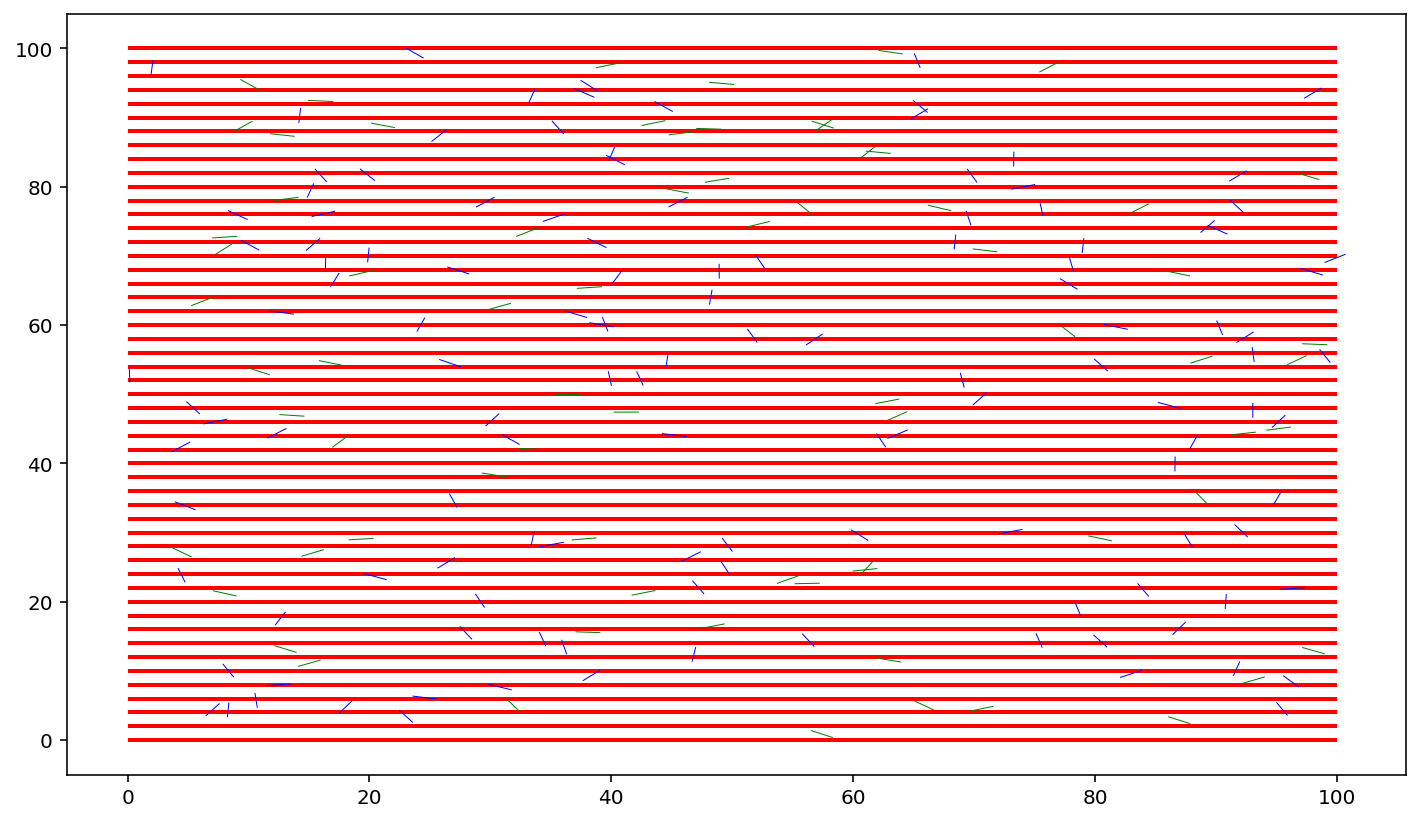

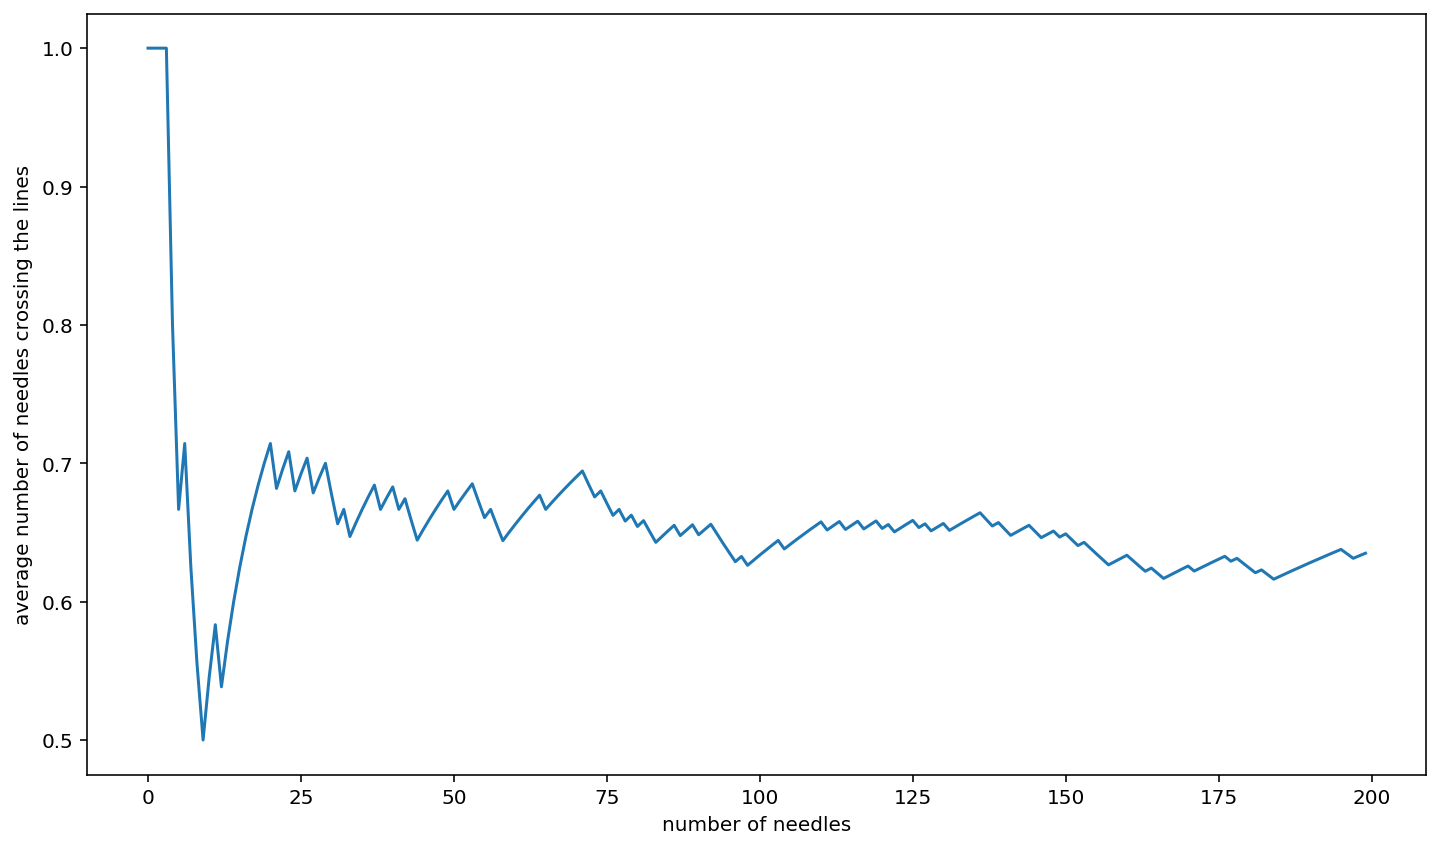

figure 2


In [36]:
boundary=100 # the size of the space that the needles will be dropped at
needles=200 # total needles dropped
needle_lenght=2#the lenght of a needle
floorboard_width=2#spacing between floorborads
floorboard_color="red"
needle_cut_color="blue"
needle_color="green"
needle=Needle()
sim=Simulation()
sim.plot()
print("figure 2")

Figure 2 shows the result of this experiment.

It can be seen that the probability of the event of the needle crossing a line can easily be calculated, yielding a value of 0.635 with an error of 0.00619. There can also be seen a graph of probabilities with respect to the number of needles dropped is present as well.

This graph appears to be jagged, showing an initial rapid increase of probability, followed by a gradual settlement onto some value. Pi can also be calculated to a good extent, having a value of 3.149606299212598 with an error of 0.008013645622805043 however this highly accurate result is due to chance,as if the experiment is run again and again it can be seen that the result is less accurate than this. 

It is good to note that in order to calculate pi the length of a needle must be smaller or equals to the width of a floorboard, this is because the fundamental relationships shown in equations 1-4 are only valid for this circumstance, if for example, the needle length is larger than the width of the floorboard then the probability equation(1) will be changed due to a change in the underlying relationships between the characteristics of the lines and the needles themselves. It is also to be noted that for any combination of needle length and line separation the algorithm will correctly calculate the probability of an intersection event, even though pi will not be an accurate value. To test this let's perform the same experiment with 200 needles but let's take the needles to be larger in size than the line separation. 


For a more complete Monte-Carlo experiment, the simulation will be performed with 10000 needles:

0.935 : the probabillity that a needle will cross the line for 200  needles with flooraboard width of 2  and needle lenght of 10
calculated value of pi for this run 10.695187165775401 with an erorr of : 7.553594512185608


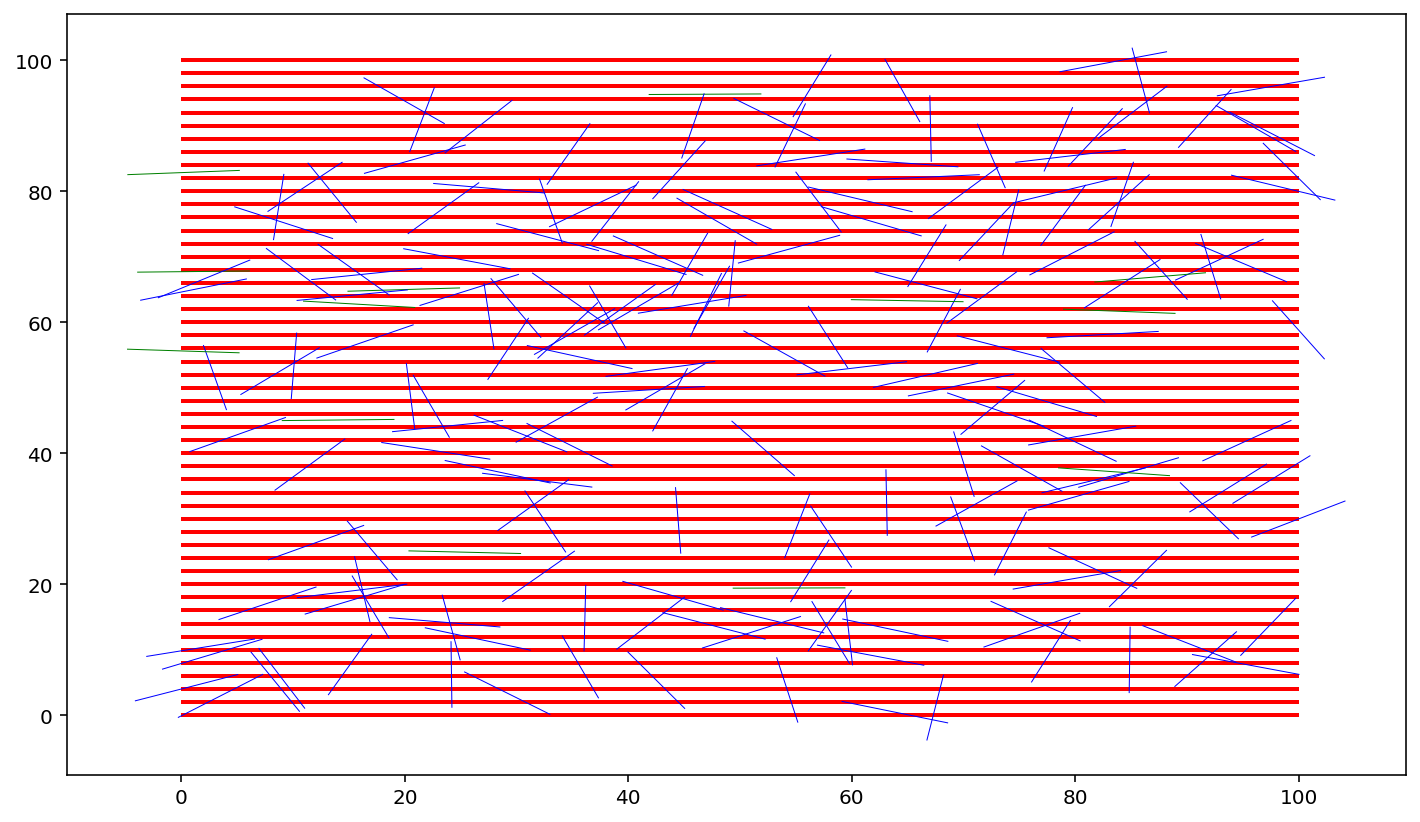

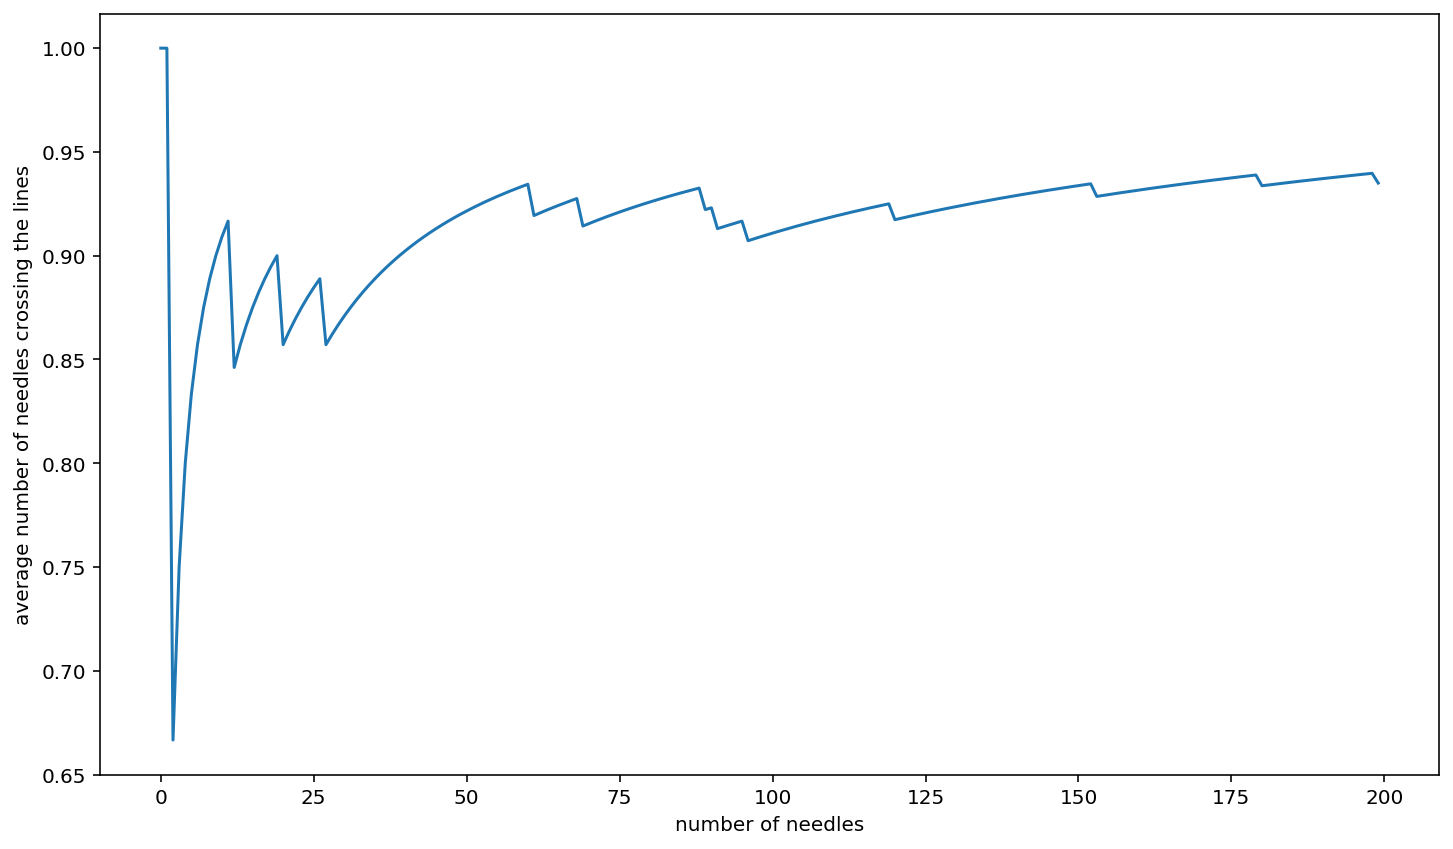

figure 3


In [35]:
boundary=100 # the size of the space that the needles will be dropped at
needles=200 # total needles dropped
needle_lenght=10#the lenght of a needle
floorboard_width=2#spacing between floorborads
floorboard_color="red"
needle_cut_color="blue"
needle_color="green"
needle=Needle()
sim=Simulation()
sim.plot()
print("figure 3")

Results are shown in figure 3.

it can be seen that the value of pi is well off the documented value, however, the probability of an intersection event look correct, the longer the needle the more likely it is to intersect one or even more lines for any angle or position that it has.


For a more complete Monte-Carlo experiment, the simulation will be performed with 10000 needles and a reasonable amount of lines:

0.6249 : the probabillity that a needle will cross the line for 10000  needles with flooraboard width of 2  and needle lenght of 2
calculated value of pi for this run 3.2005120819331094 with an erorr of : 0.058919428343316316


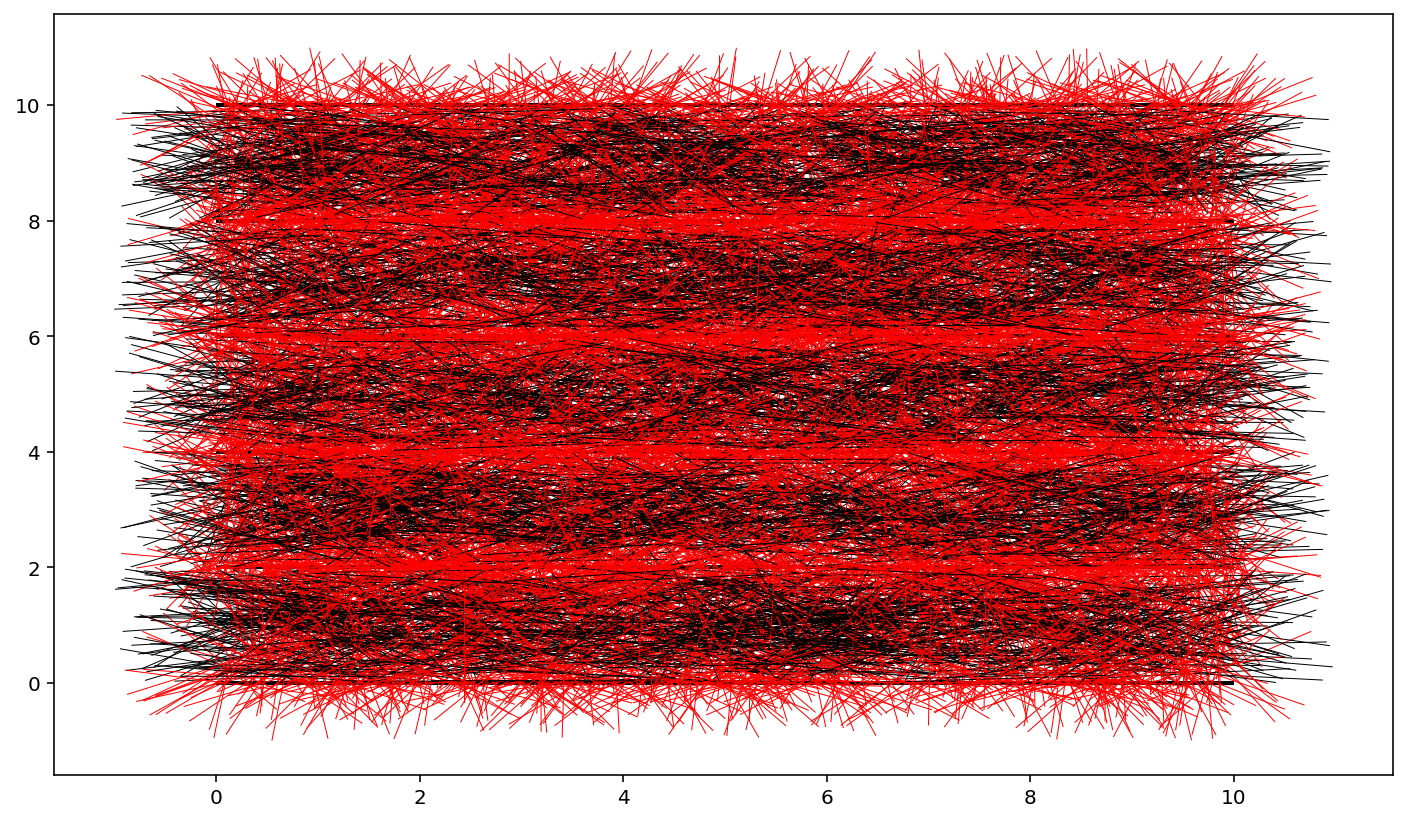

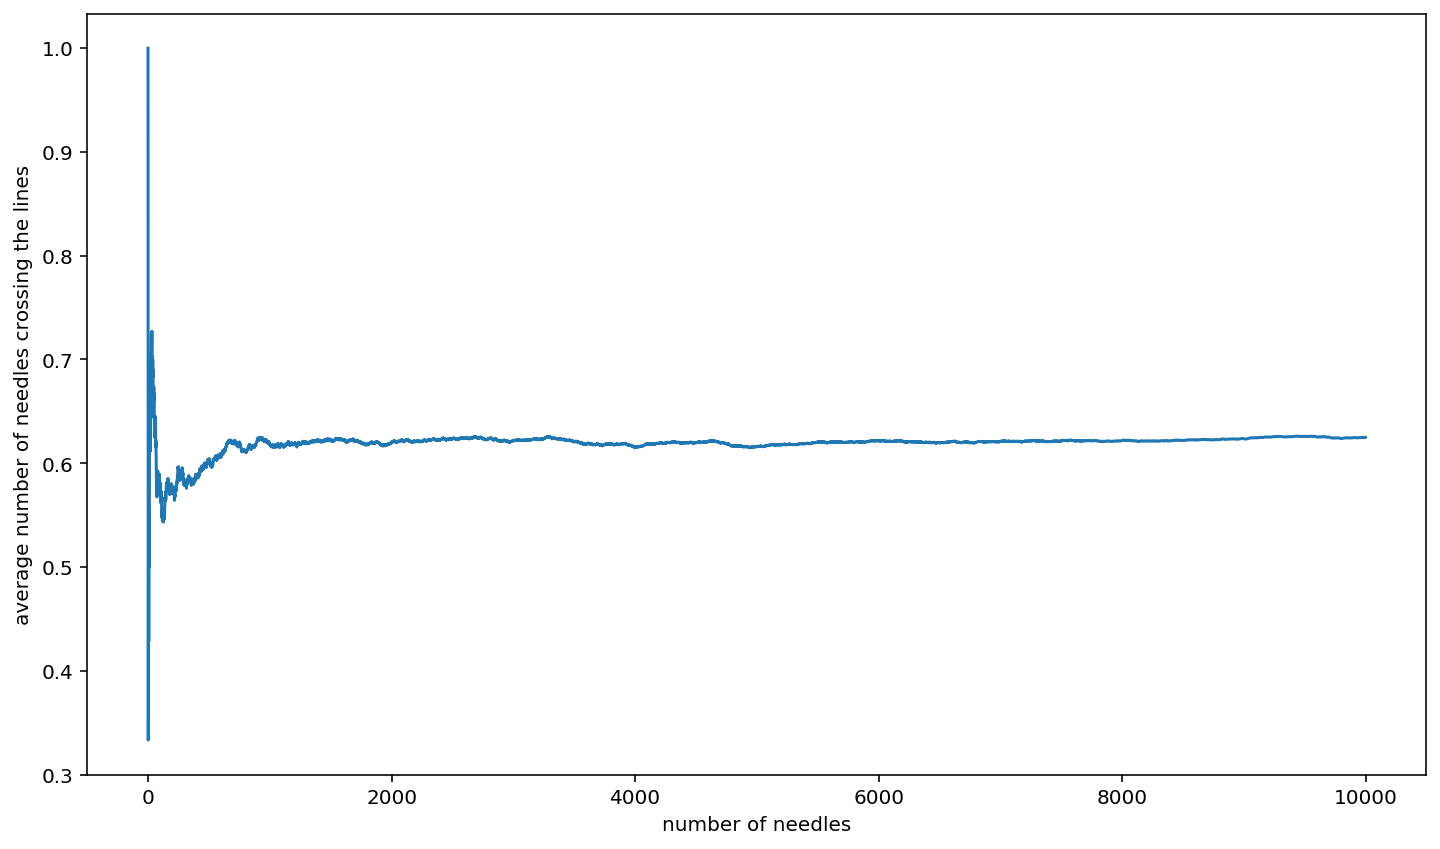

figure 4


In [34]:
boundary=10 # the size of the space that the needles will be dropped at
needles=10000 # total needles dropped
needle_lenght=2#the lenght of a needle
floorboard_width=2#spacing between floorborads
floorboard_color="black"
needle_cut_color="red"
needle_color="black"
sim=Simulation()
sim.plot()
print("figure 4")

Figure 4 shows the results of this experiment.

For 10000 needles it can be seen that the amount of time that it takes to simulate this event is about a minute so as we increase the amount to more and more it will become more and more difficult to simulate this, this may be due to the simulation having to create a graphical needle for each needle, also, the needles have a well-defined position in the plane that is generated and stored in a list. It can be seen that the probability for a needle length of 2 and a floorboard width of 2 for 10000 needles comes to be about 0.6392, and the derived value for pi is  3.2005120819331094 with an error of 0.058919428343316316, although having a larger number of needles the result is similar to the previous experiment concerning 1000 needles which may point to the fact that a large increase in the number of needles will lead to a smaller increase in the accuracy. The probability change can be seen as converging to some value while initially starting quite far away from that value.

Now let's run the second "analytical" method which uses derived boundary conditions, we will run this algorithm with a line distance of 1 and needle length of 1 for 10000 needles :

the probability estimated is: 0.6301630163016302
the value of pi estimated is 3.1737819393747024 with an error of  0.032189285784909316
---------------------------------------------------------------------------------------------
figure 5


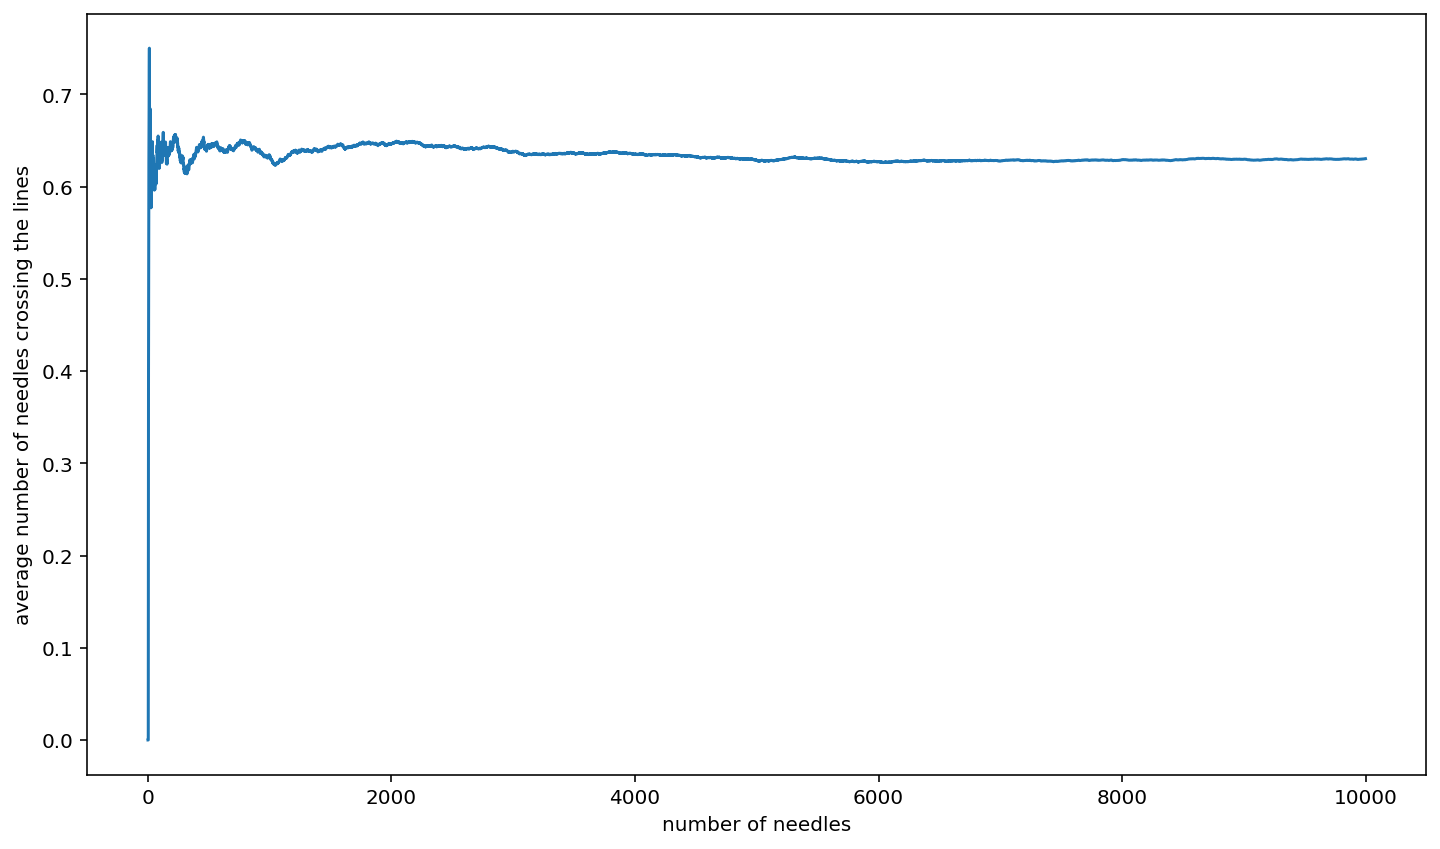

<Figure size 864x504 with 0 Axes>

In [40]:
#see the methods section for full description of the code

number_of_needles=10000
distance_between_lines=1
lenght_of_needle=1

needles=np.zeros(number_of_needles)
average_estimate=[]
for i in range(number_of_needles):
    needles[i]=generate_needle()
    average_estimate.append(np.average(needles[0:i]))

plt.figure()
plt.plot(np.arange(number_of_needles),average_estimate)
plt.xlabel("number of needles")
plt.ylabel("average number of needles crossing the lines")
plt.figure()
print("the probability estimated is:",average_estimate[len(average_estimate)-1])
print("the value of pi estimated is",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines),"with an error of ",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines)-np.pi)
print("---------------------------------------------------------------------------------------------")
print("figure 5")

Figure 5 shows the outcomes of this experiment.

It can immediately be seen how much faster this algorithm is compared to the previous "raw" algorithm, with the same starting conditions, this algorithm achieved to find an estimation of pi in 0.55 seconds compared to 60 seconds for the previous algorithm this is a 120x increase in the speed of processing pi, this increase also allows us to compute pi for much higher number of needles for example 1000000 needles:

the probability estimated is: 0.6371036371036372
the value of pi estimated is 3.1392066902839884 with an error of  -0.0023859633058047613
-------------------------------------------------------------------------------------------
figure 6


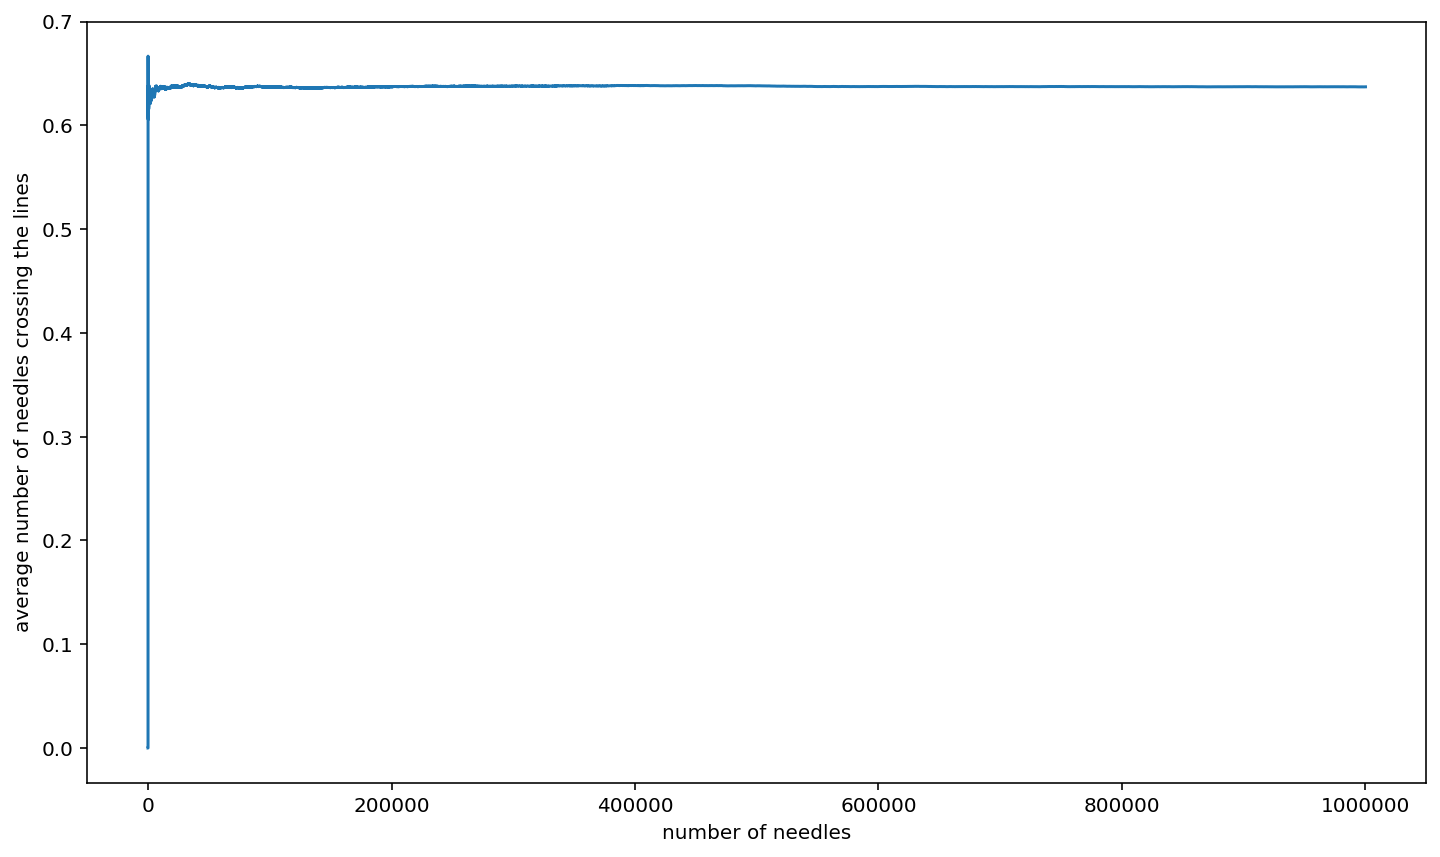

<Figure size 864x504 with 0 Axes>

In [41]:
#see the methods section for full description of the code

number_of_needles=1000000
distance_between_lines=1
lenght_of_needle=1

needles=np.zeros(number_of_needles)
average_estimate=[]
for i in range(number_of_needles):
    needles[i]=generate_needle()
    average_estimate.append(np.average(needles[0:i]))

plt.figure()
plt.plot(np.arange(number_of_needles),average_estimate)
plt.xlabel("number of needles")
plt.ylabel("average number of needles crossing the lines")
plt.figure()

print("the probability estimated is:",average_estimate[len(average_estimate)-1])
print("the value of pi estimated is",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines),"with an error of ",(2*lenght_of_needle)/(average_estimate[len(average_estimate)-1]*distance_between_lines)-np.pi)
print("-------------------------------------------------------------------------------------------")
print("figure 6")

The results in this experiment are shown in figure 6.

It can be seen that the results show that for 1000000 needles the approximation for pi is getting extremely close to the actual value, having a value of 3.1392066902839884 and an error of  0.0023859633058047613. There can also be seen a strong convergence to a particular probability with the figure showing a horizontal line at that probability. This is an extremely impressive outcome for this calculation not only is this calculation significantly faster than the "raw" simulation, but it also finds pi to a good enough degree, the only problem that's present here is the fact that if pi was to be pinpointed to an extremely accurate value then we would need to run this calculation with many more millions of needles, however, with the error present, the calculation was a success in determining a good approximation of pi.  

## Discussion


The purpose of this study was to find a way to emulate Buffon's needle experiment using Monte-Carlo methods, in order to develop a fast and accurate algorithm for determining the probability of an intersection event, and from there to determine the value of pi, two methods were used which will be discussed here.

The "raw" Monte-Carlo method selected a random set of x,y, and $\theta$ values in order to generate a needle, this needle was then placed onto a coordinate plane with predetermined horizontal lines, the number of horizontal lines depended on the user's input of the line spacing and coordinate space size. The simulation successfully showed how each needle was placed onto the plane and which needles intersected the plane seen in figure 1. Figure 1 also showed a graph of probabilities for each needle dropped, that is, how the probability of intersection changes with a changing needle count, for figure 1, which had a relatively low needle count of 1000, the probability graph could be seen as a jagged graph with some sense of a convergence starting around the 200 needle mark, however, due to the low count of needles a decisive approximation of the probability of an intersection even could not be confidently determined.

In figure 2 the adaptability of the code was shown, changing the line separation and the output colors, the number of needles was also dropped to an extremely low number (for this algorithm) of 200. This low needle count showed an extremely jagged probability graph, however, it showed insight into how the probability started to change for low amounts of needles. There seemed to be an initial value of either 1 or 0 which makes sense, if only one needle is investigated it can either have intersected a line which would place the probability of an intersection at 1 and vice versa. As the number of needles has increased the probability reached a value of about 0.35 at the 50th needle and then the probability started to decrease and so converge, however, in order for the probability to sufficiently converge, more needles would need to be thrown.


In figure 3 the algorithm was tested to see if it would work with a needle length larger than the line separation, it worked perfectly, plotting the lines onto the plane and calculating the probability of an intersection, however it was unable to calculate pi as the fundamental relationship between the probability and the needles properties and space has been changed.


In figure 4 the outcomes of 10000 needles thrown are shown. The simulation itself becomes messy and somewhat un-understandable as so many needles are present, however, the probability graph shows an extremely strong divergence onto some probability value which was determined to be about 0.6392 this probability value was the same as the theoretical probability value derived from equation 1 which highlighted the effectiveness of the code, this code was also used in order to calculate pi which was determined to be 3.128911138923655 with an error of: -0.012681514666138316. However, there was a problem with the code in general, it takes too long. The code took about 1 min to simulate the 10000 needles and an increase of the needles would take longer, which would make this code extremely inefficient to us time-wise. Another aspect with the calculation of pi was that the code had to have some boundary rules, the most important of which is that the separation of the horizontal lines should be larger than the length of a needle, if these conditions are not met the algorithm will calculate the probability of an intersection event however it will not be able to calculate an approximation of pi, this because the fundamental probabilistic rules that govern equation 1 will be changed so the probability of an intersection event will have a different solution that differs drastically from eq(1), this is why most of the figures have their line separation equals to or larger than the needle length, however, the code is still usable if this condition is not met. In order to calculate pi to a good enough degree, we would need to throw more needles however the "raw" algorithm is extremely time inefficient due to its simulative nature of plotting the needles as well as generating the needles. Another good way of solving this problem is to use the fundamental relationships of the abstraction of the problem.

The results for this abstraction are shown in figure 5 where 10000 needles are thrown. Firstly it can be seen that this code is much shorter than the previous code which adds a benefit of file reduction when using this algorithm. The code itself outputs an estimated probability of 0.6392639263926393 which is again the same result derived from equation 1 for needle length 1 and line separation of 1, it also calculates pi to a good degree, the value of pi was estimated to be 3.1285982478097623 with an error of 0.01299440578003086 which is an extremely impressive result considering that the total calculation took only 0.55 seconds which is about 120 times quicker than the previous algorithm. The improved speed of this method will allow us to throw more needles in order to calculate pi to a good extent, so the method was used to throw 1000000 needles onto the abstracted plane.

Figure 6 shows the result of the 1000000 needle experiment. It can be seen that the probability shows an extremely strong convergence onto some value of about 0.6, the value determined was seen to be the probability estimated is 0.636971636971637, however, the surprising result is that the value of pi was calculated to be 3.139857230548958 having an error of only 0.0017354230408352933 which is about a 0.05% discrepancy from the actual value of pi.

It is important to highlight the strengths and weaknesses of these methods so that general improvements can be made in the future. Starting with the "raw" method, it is an extremely useful tool for visualizing and calculating the probability of an intersection event, and it can be argued that it is the purest form of a Monte-Carlo method regarding this problem since every attribute that a needle has, is taken to be random. This method also calculates pi to a good degree however the time it takes to calculate the probability of an intersection event and therefore pi is problematic, as the algorithm plots the simulation and calculates the intersection probability it would take much more time than an algorithm which just calculates the probability of an intersection event. The algorithm itself can have many parameters changed easily which gives the user full control of the plane that the simulation takes place in, however, this may introduce more time into essential calculations, for example, increasing the number of lines will inevitably increase the time it takes to compute the probability of an intersection event since there are so many lines to check.

The "analytical" algorithm removes nearly all of the problems that the "raw" algorithm has. By removing the visual aspect of the algorithm and abstracting the space into just two lines the algorithm was able to achieve a 120 times increase in computational speed that made it possible to calculate a good approximation of pi by using a large number of needles in a relatively short amount of time.

However there is an intrinsic problem with this general solution of finding pi, by all means, it is not an effective way to find pi. Both algorithms of course find pi to a good enough degree however the intrinsic probability laws in the problem give more complexity to this problem, more complexity requires more random data points to pinpoint this probability, and thus this problem requires not only 1000000 data points( needles) but many more millions to calculate pi to a degree that is suitable for the modern scientific community. However there is a good use for this algorithm, the fact that pi can be so accurately pinpointed by the Buffon's needle problem and the solution derived in this study proves that this method can pave a way for the Buffon's needle project to have amazing uses in the data science sector[7] in order to find relationships in the random distribution of data points onto some arbitrary boundary space.

Improvements would need to be made to this solution so that it is as efficient as possible. The reduction of computing time is an important aspect to improve upon, some of the code contains iterative loops that may be able to be simplified by further reading into probability laws and geometric probability. Furthermore, a lot of the data is saved in lists, if the size of these lists can be reduced then the processing time would decrease by a good amount, for example, in the "analytical" method for this problem the "needles" list contains an array of 1's and 0's each signifying if a needle has intersected a line, instead of using a list, just normal integers can be used in order to calculate the probability of an intersection event. These types of modifications can decrease the computing time by a good amount which would help the algorithm calculate pi at a faster rate making it more efficient.



## Conclusion
 Two Monte-Carlo methods were used to determine the probability of an intersection event in the Buffon's needle problem and therefore determining pi. The first solution used an object-oriented programming approach to simulate the Buffon's needle experiment completely in order to allow full user flexibility, this solution was useful for examining the effects of different settings in the value of the probability and it calculated the value of pi to an acceptable degree with a value of pi approximated at 3.128911138923655 with an error of -0.012681514666138316 for 10000 needles. The algorithm also contained code to present a graph of the change of probability with respect to needle count and it could be seen that the probabilities converged at some point dependent on the settings the user has inserted. However, this method was costly in time and an increase in the needle count was not feasible as it would take a long time to compute.


In order to deal with the limitations of time that the previous algorithm had, an abstraction of the problem was made by defining well-defined boundary conditions for both position and orientation of the needle and abstracting the plane in order for it to have just two lines to cross. This method gave significantly faster results however lacked the visual aspect of the previous "raw" simulation. The abstracted "analytical" method was used to simulate 1000000 million needle drops in order to approximate pi at a value of 3.139857230548958 having an error of only 0.0017354230408352933 which is about a 0.05% discrepancy from the actual value of pi.

The methods were determined to be a success in calculating pi reliably however in order to calculate pi to an acceptable degree that is intact with the modern scientific community, these methods must generate millions of more needles which would take an extreme amount of time which would make this method unpractical. In order to improve this, a general modification of the code using insights from probabilistic geometry will need to be implemented.


## References

[1] - Daniel A. Klain,Gian-Carlo Rota,Introduction to Geometric Probability,Lezioni Lincee,December 1997

[2] - Luigi Sambuelli,Claudio Luciano Strobbia,The Buffon's needle problem and the design of a geophysical survey,50(4):403 - 409,July 2002

[3]-Rogerson, P.A., 1990. Buffon's needle and the estimation of migration distances. Mathematical Population Studies, 2(3), pp.229-238.

[4]-Schuster, E.F., 1974. Buffon's needle experiment. The American Mathematical Monthly, 81(1), pp.26-29.

[5] - Bressert, Eli. Scipy and Numpy: An Overview for Developers. O'Reilly. ISBN 978-1-4493-0546-8.2012

[6] - Whitaker, Jeffrey. "The Matplotlib Basemap Toolkit User's Guide (v. 1.0.5)". Matplotlib Basemap Toolkit documentation. 24 April 2013

[7] - Ma, Rui, and Qi Hao. "Buffon's needle model based walker recognition with distributed binary sensor networks." 2012 IEEE International Conference on Multisensor Fusion and Integration for Intelligent Systems (MFI). IEEE, 2012.